# EDA

This notebook is used for data exploration.

In [2]:
import os
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN/notebooks'

In [3]:
os.chdir('/home/ubuntu/Thesis-KNMI-FoggyGAN/')
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN'

In [4]:
import pandas as pd

df = pd.read_pickle("data/raw/allAnnotations20210422_pkv4.pkl")

In [5]:
df

# MEANING OF DAY_PHASE LABELS

# 0;"night"
# 1;"day"
# 10;"civil dawn"
# 11;"civil dusk"
# 20;"nautical dawn"
# 21;"nautical dusk"
# 30;"astronomical dawn"
# 31;"astronomical dusk"

,filepath,label,day_phase,filename
0,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,No Fog,1,A50-HM1927-ID11542_20181102_0651.jpg
1,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...,No Fog,1,A15-HM797-ID12045_20181103_0941.jpg
2,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,No Fog,1,A28-HM1982-ID13517_20181103_0801.jpg
3,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A4...,No Fog,1,A4-HM643-ID111940_20181103_0831.jpg
4,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,No Fog,1,A50-HM1838-ID11510_20181103_1011.jpg
...,...,...,...,...
36354,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,No Fog,1,A2-HM765-ID10913_20170905_1100.jpg
36355,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A4...,No Fog,11,A4-HM118-ID13975_20200121_1610.jpg
36356,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1907-ID11535_20200121_2300.jpg
36357,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,No Fog,20,A50-HM1858-ID11642_20170915_0431.jpg


In [6]:
df[df.filename == 'A1-HM46-ID12951_20170911_1301.jpg']

,filepath,label,day_phase,filename
35643,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...,Fog,1,A1-HM46-ID12951_20170911_1301.jpg


In [22]:
df.groupby('day_phase').count()

,filepath,label,filename
day_phase,,,
0,17939,17939,17939
1,21007,21007,21007
10,1785,1785,1785
11,63,63,63
20,1788,1788,1788
21,51,51,51
30,110,110,110
31,115,115,115


In [30]:
df.groupby('label').count()

,filepath,day_phase,filename
label,,,
Cannot Say,2592,2592,2592
Fog,1497,1497,1497
No Fog,38769,38769,38769


In [31]:
df[df.label == 'Fog']

,filepath,label,day_phase,filename
85,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...,Fog,1,A15-HM221-ID12375_20181216_0900.jpg
88,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...,Fog,1,A16-HM240-ID12262_20181216_0820.jpg
89,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,Fog,1,A27-HM650-ID10969_20181216_1210.jpg
91,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...,Fog,1,A16-HM240-ID12262_20181216_0840.jpg
92,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,Fog,1,A27-HM665-ID10963_20181216_0920.jpg
...,...,...,...,...
36329,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A9...,Fog,0,A9-HM427-ID12855_20200121_0400.jpg
36334,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1887-ID11631_20200101_2231.jpg
36345,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,Fog,20,A27-HM584-ID10976_20170917_0441.jpg
36356,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1907-ID11535_20200121_2300.jpg


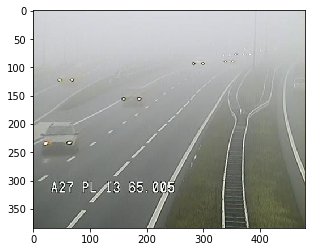

In [49]:
from matplotlib import pyplot as plt
import os

img_folder = 'images_data/'
fnames = df.filename.values

img_path = os.path.join(img_foler, fnames[89])
img = plt.imread(img_path)
plt.imshow(img)